## Atividade 5

- Abra os dados da votorantim e crie um wordlcloud no campo Descrição
- Faça uma lista das top 10 palavras mais frequentes no texto
- Faça um filtro para obter um padrão de incidente (ex: falta de EPI, uso de celular, etc)

In [9]:
import csv, pandas as pd, numpy as np

In [10]:
import matplotlib.pyplot as plt

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [12]:
#Importando os dados csv e criando um objeto pandas DataFrame

In [13]:
df_votorantim = pd.read_csv('./votorantim-dados/20200828_SSO.csv', low_memory=False)

In [14]:
df_votorantim.head()

,Coluna ID,Matrícula do Usuário Cadastrante,Data,Hora,Origem,UGB/DESC_GG (Nível 2),GERENCIA/AREA FABRICA (Nível 3),DEPARTAMENTO (Nível 5),Descrição,Nível do Acidente,Potencial de Gravidade
0,321130,968254.0,20/01/2020,15:45,DD13,ENGENHARIA E TECNOLOGIA,ENGENHARIA E TECNOLOGIA,3OC001 - FCA-ENGENHARIA- OBRA,Ao fechar o porta luvas do veículo (caminhão p...,I,NaN
1,366287,140645.0,19/02/2020,15:00,DD13,GESTÃO DE ATIVOS,GESTÃO PATRIMONIO IMOBILIARIA,4FP001 - FAZENDA PANTOJO,Ao fazer vistoria nas áreas das fazendas com o...,I,NaN
2,314559,231661.0,17/01/2020,11:00,DD13,FINANCEIRO,TI,4TI001 - TI - VM - CBA,O empregado estava realizando treinamento quan...,II,NaN
3,365212,4262.0,19/02/2020,17:15,DD13,FAZENDA ENGENHO,LEGADO VERDES DO CERRADO,1LE200 - REBANHO BOVINO,"Incêndio em área de pastagem, atingindo área t...",III,NaN
4,346479,197014.0,10/02/2020,10:00,DD13,FUNDIÇÃO,OPERAÇÃO FUNDIÇÃO,1CA001 - FCA-CASTER,DURANTE CORREÇÃO DE FORNO PELO OPERADOR DE FOR...,II,NaN


In [28]:
## Método set_index() para Definir a 'Data' como o index do df

In [15]:
df_votorantim.set_index('Data', inplace=True)
df_votorantim.head()

,Coluna ID,Matrícula do Usuário Cadastrante,Hora,Origem,UGB/DESC_GG (Nível 2),GERENCIA/AREA FABRICA (Nível 3),DEPARTAMENTO (Nível 5),Descrição,Nível do Acidente,Potencial de Gravidade
Data,,,,,,,,,,
20/01/2020,321130,968254.0,15:45,DD13,ENGENHARIA E TECNOLOGIA,ENGENHARIA E TECNOLOGIA,3OC001 - FCA-ENGENHARIA- OBRA,Ao fechar o porta luvas do veículo (caminhão p...,I,NaN
19/02/2020,366287,140645.0,15:00,DD13,GESTÃO DE ATIVOS,GESTÃO PATRIMONIO IMOBILIARIA,4FP001 - FAZENDA PANTOJO,Ao fazer vistoria nas áreas das fazendas com o...,I,NaN
17/01/2020,314559,231661.0,11:00,DD13,FINANCEIRO,TI,4TI001 - TI - VM - CBA,O empregado estava realizando treinamento quan...,II,NaN
19/02/2020,365212,4262.0,17:15,DD13,FAZENDA ENGENHO,LEGADO VERDES DO CERRADO,1LE200 - REBANHO BOVINO,"Incêndio em área de pastagem, atingindo área t...",III,NaN
10/02/2020,346479,197014.0,10:00,DD13,FUNDIÇÃO,OPERAÇÃO FUNDIÇÃO,1CA001 - FCA-CASTER,DURANTE CORREÇÃO DE FORNO PELO OPERADOR DE FOR...,II,NaN


In [29]:
#Verificar valores nulos e substituí-los por 0, na coluna em análise: 'Descrição'

In [16]:
df_votorantim['Descrição'].isna()

Data
20/01/2020    False
19/02/2020    False
17/01/2020    False
19/02/2020    False
10/02/2020    False
              ...  
02/07/2019    False
03/07/2019    False
03/07/2019     True
01/07/2019    False
02/07/2019    False
Name: Descrição, Length: 410287, dtype: bool

In [17]:
df_votorantim['Descrição'].fillna(0, inplace=True)
df_votorantim['Descrição'].isna()

Data
20/01/2020    False
19/02/2020    False
17/01/2020    False
19/02/2020    False
10/02/2020    False
              ...  
02/07/2019    False
03/07/2019    False
03/07/2019    False
01/07/2019    False
02/07/2019    False
Name: Descrição, Length: 410287, dtype: bool

In [ ]:
#Implementar StopWords

In [18]:
stopwords = open('./votorantim-dados/stopwords.txt').readlines()
stopwords

['de \n',
 'a \n',
 'o \n',
 'que \n',
 'e \n',
 'do \n',
 'da \n',
 'em \n',
 'um \n',
 'para \n',
 'é \n',
 'com \n',
 'não \n',
 'uma \n',
 'os \n',
 'no \n',
 'se \n',
 'na \n',
 'por \n',
 'mais \n',
 'as \n',
 'dos \n',
 'como \n',
 'mas \n',
 'foi \n',
 'ao \n',
 'ele \n',
 'das \n',
 'tem \n',
 'à \n',
 'seu \n',
 'sua \n',
 'ou \n',
 'ser \n',
 'quando \n',
 'muito \n',
 'há \n',
 'nos \n',
 'já \n',
 'está \n',
 'eu \n',
 'também \n',
 'só \n',
 'pelo \n',
 'pela \n',
 'até \n',
 'isso \n',
 'ela \n',
 'entre \n',
 'era \n',
 'depois \n',
 'sem \n',
 'mesmo \n',
 'aos \n',
 'ter \n',
 'seus \n',
 'quem \n',
 'nas \n',
 'me \n',
 'esse \n',
 'eles \n',
 'estão \n',
 'você \n',
 'tinha \n',
 'foram \n',
 'essa \n',
 'num \n',
 'nem \n',
 'suas \n',
 'meu \n',
 'às \n',
 'minha \n',
 'têm \n',
 'numa \n',
 'pelos \n',
 'elas \n',
 'havia \n',
 'seja \n',
 'qual \n',
 'será \n',
 'nós \n',
 'tenho \n',
 'lhe \n',
 'deles \n',
 'essas \n',
 'esses \n',
 'pelas \n',
 'este \n',
 'f

In [ ]:
#Remover o elemento de quebra de linha:

In [ ]:
#Exemplo de implementação :
#for element in stopwords:
#    stopwords_list.append(element.strip())

In [19]:
stopwords_list = [element.strip() for element in stopwords]
stopwords_list

['de',
 'a',
 'o',
 'que',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'é',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'foi',
 'ao',
 'ele',
 'das',
 'tem',
 'à',
 'seu',
 'sua',
 'ou',
 'ser',
 'quando',
 'muito',
 'há',
 'nos',
 'já',
 'está',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'era',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'ter',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'estão',
 'você',
 'tinha',
 'foram',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'têm',
 'numa',
 'pelos',
 'elas',
 'havia',
 'seja',
 'qual',
 'será',
 'nós',
 'tenho',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'fosse',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo

In [ ]:
# Crie um wordlcloud

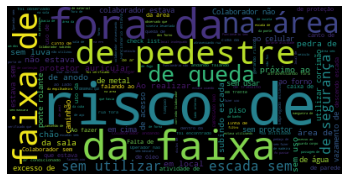

In [20]:
#A variável 'text' recebe todo o conteúdo da coluna Descrição, sendo do tipo array de char
text = " ".join(str(review) for review in df_votorantim['Descrição'])

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

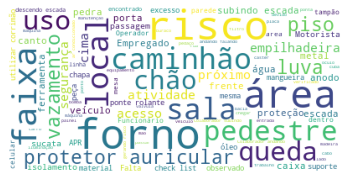

In [21]:
#Aplicando o filtro com StopWord no worldCloud

wordcloud = WordCloud(stopwords=stopwords_list, max_font_size=50, max_words=100, background_color="white").generate(text)

#plt.figure(figsize=(12,8))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()



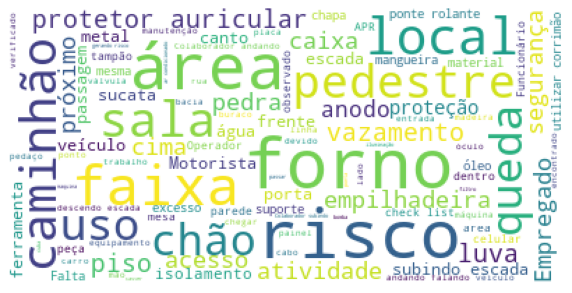

In [22]:
#Aplicando o filtro com StopWord no worldCloud

wordcloud = WordCloud(stopwords=stopwords_list, max_font_size=50, max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

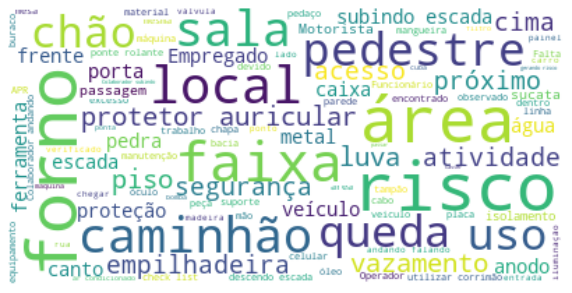

In [69]:
#Aplicando o filtro com StopWord no worldCloud

wordcloud = WordCloud(stopwords=stopwords_list, max_font_size=50, max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [67]:
#Faça uma lista das top 10 palavras mais frequentes no texto


In [ ]:
#Implementaçaõ um Dict com key: palavra, valor: numero de repetições, a partir da lisa 'text'

wordfreq = []
wordfreq = [text.count(p) for p in text]
dictfreq = list(zip(text,wordfreq))

aux = [(dictfreq[key], key) for key in dictfreq]
    aux.sort()
    aux.reverse()

In [ ]:
#Opção 2 :<https://stackoverflow.com/questions/60234036/python-word-count-from-wordcloud>

In [1]:
top10 = WordCloud().process_text(text)
type[top10]

NameError: name 'WordCloud' is not defined

In [ ]:
rank = wordcloud.process_text(text)
sort_rank = sorted(rank.items(), key=lambda x: x[1], reverse=True)
top10 = dict(sort_rank[0:10])
top10

In [68]:
#Faça um filtro para obter um padrão de incidente (ex: falta de EPI, uso de celular, etc)